In [9]:
import numpy as np
import matplotlib.pyplot as plt
from src.PVC_points import PVC_points as PVC

In [10]:
# Constantes :
NUMBER_OF_POINTS = 10
NUMBER_OF_ESSAIES = 100

# Génération des points :
np.set_printoptions(precision=2)
for i in range(NUMBER_OF_ESSAIES):
    PVC.generer_fichier(NUMBER_OF_POINTS, f"points_{i + 1}")

In [11]:
cycles_ppp = []
cycles_opt_ppp = []
cycles_opt_prim = []
cycles_hds = []

GF = PVC()
for i in range(NUMBER_OF_ESSAIES):       
    GF.charger_de_fichier(f"./data/points_{i + 1}.txt")
    points = GF.points_   
    c_ppp = GF.PPP(points[0])
    cycles_ppp.append(GF.longueur(c_ppp))

    c_opt_ppp = GF.OptPPP(points[0])
    cycles_opt_ppp.append(GF.longueur(c_opt_ppp))

    c_opt_prim = GF.OptPrim()
    cycles_opt_prim.append(GF.longueur(c_opt_prim))

    c_hds = GF.HDS()
    cycles_hds.append(GF.longueur(c_hds))

In [12]:
stats = np.vstack([np.array(cycles_ppp), np.array(cycles_opt_ppp), \
                   np.array(cycles_opt_prim), np.array(cycles_hds)]).T

np.set_printoptions(precision=2)
means = stats.mean(axis=0)
lp, lop, lpr, lhds = means
print(f"La longueur moyenne des cycles obtenus a partir de PPP : {lp:.3f}")
print(f"La longueur moyenne des cycles obtenus a partir de OptPPP : {lop:.3f}")
print(f"La longueur moyenne des cycles obtenus a partir de PVC_Prim : {lpr:.3f}")
print(f"La longueur moyenne des cycles obtenus a partir de HDS : {lhds:.3f}")

La longueur moyenne des cycles obtenus a partir de PPP : 3.481
La longueur moyenne des cycles obtenus a partir de OptPPP : 3.137
La longueur moyenne des cycles obtenus a partir de PVC_Prim : 3.427
La longueur moyenne des cycles obtenus a partir de HDS : 2.878


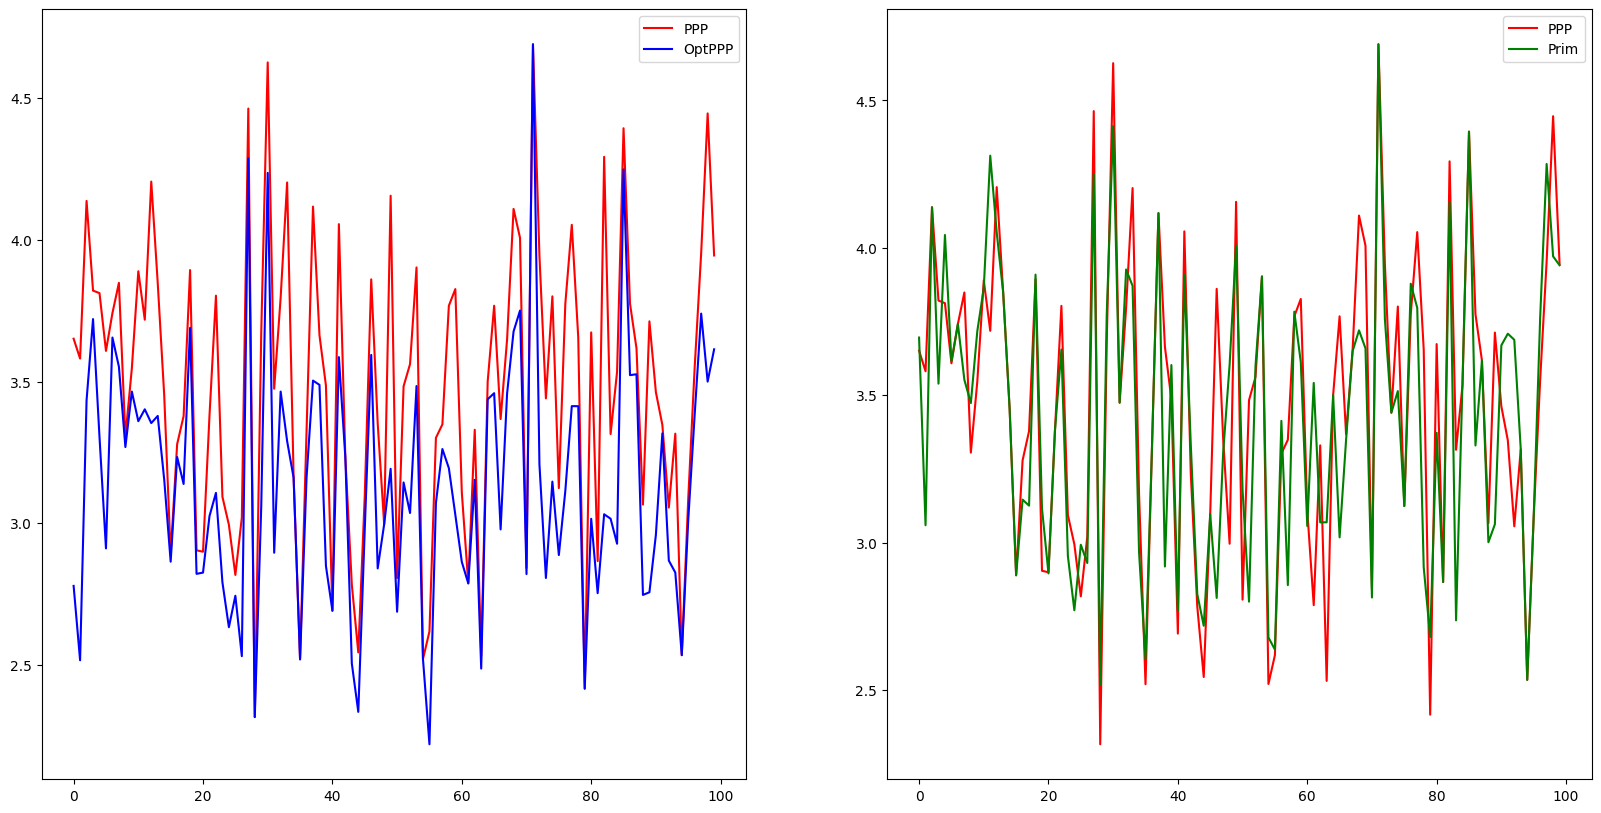

In [13]:
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.plot(range(NUMBER_OF_ESSAIES), cycles_ppp, c='red', label='PPP')
plt.plot(range(NUMBER_OF_ESSAIES), cycles_opt_ppp, c='blue', label='OptPPP')
plt.legend()
plt.subplot(122)
plt.plot(range(NUMBER_OF_ESSAIES), cycles_ppp, c='red', label='PPP')
plt.plot(range(NUMBER_OF_ESSAIES), cycles_opt_prim, c='green', label='Prim')
plt.legend()

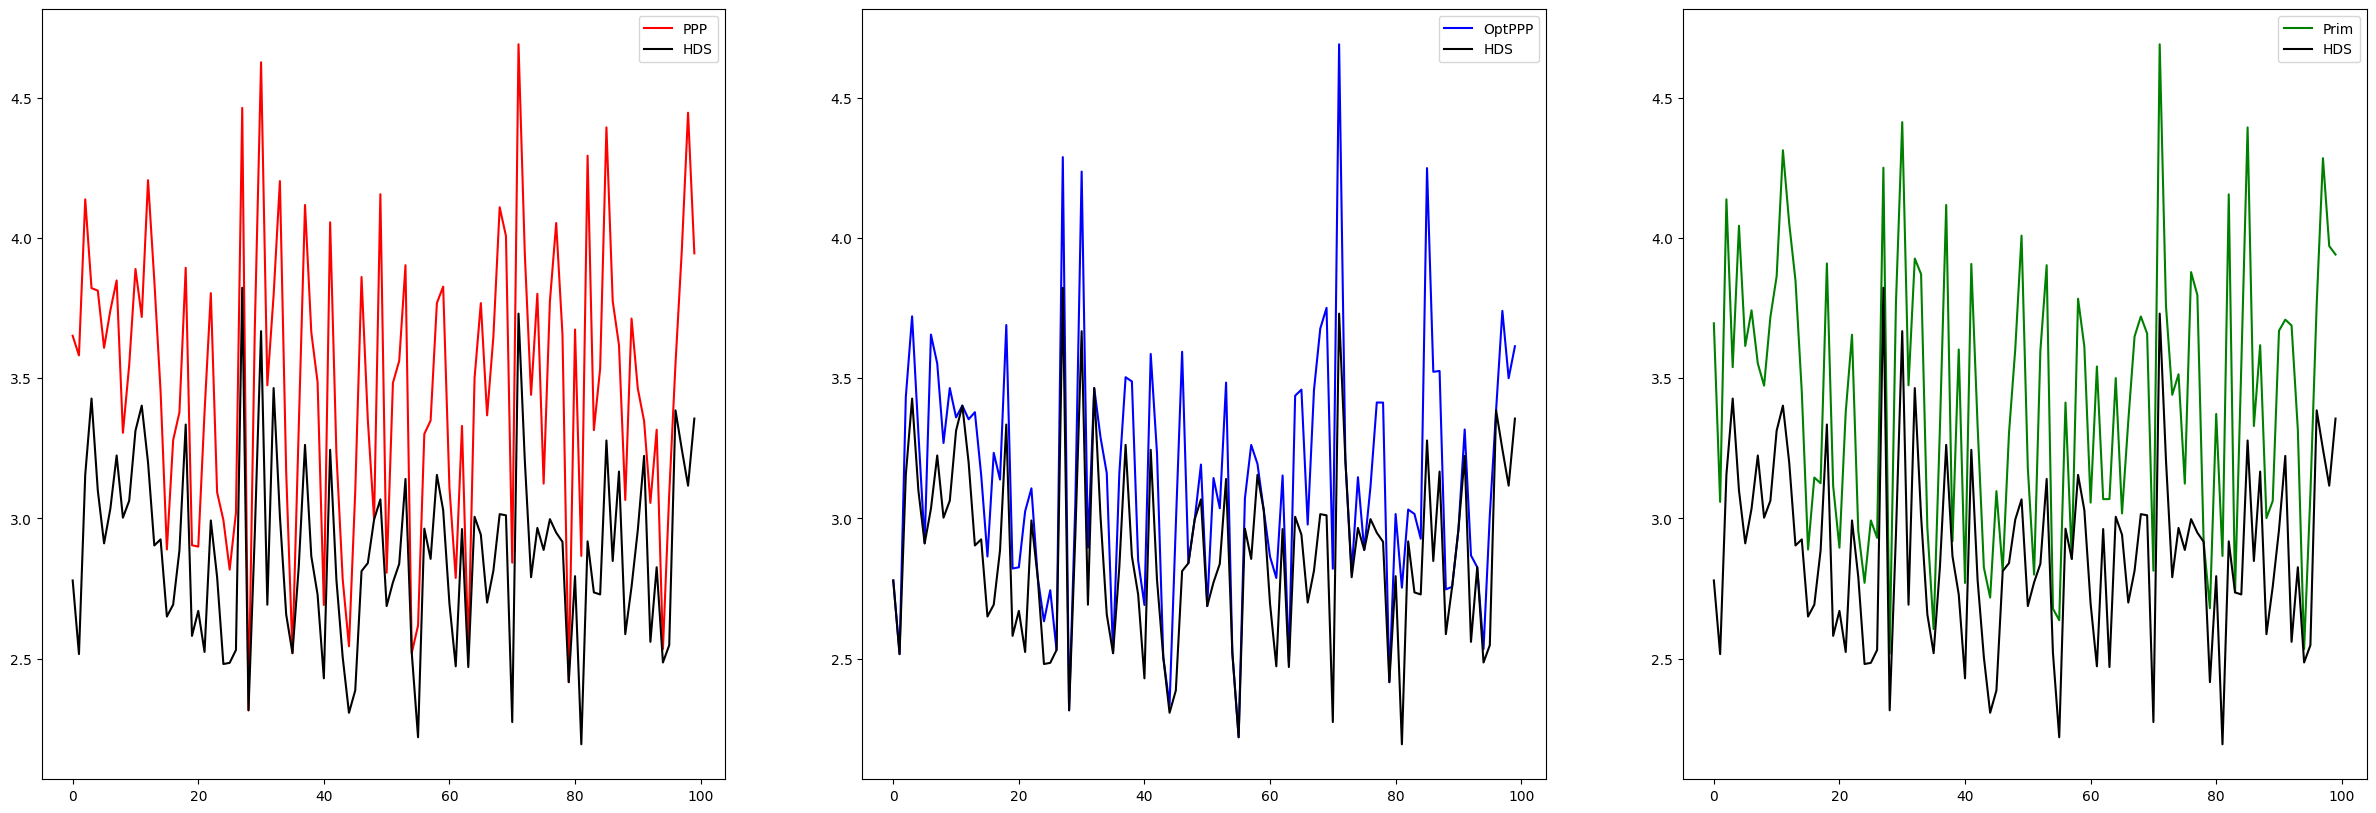

In [14]:
plt.figure(figsize=(30, 10))
plt.subplot(131)
plt.plot(range(NUMBER_OF_ESSAIES), cycles_ppp, c='red', label='PPP')
plt.plot(range(NUMBER_OF_ESSAIES), cycles_hds, c='black', label='HDS')
plt.legend()
plt.subplot(132)
plt.plot(range(NUMBER_OF_ESSAIES), cycles_opt_ppp, c='blue', label='OptPPP')
plt.plot(range(NUMBER_OF_ESSAIES), cycles_hds, c='black', label='HDS')
plt.legend()
plt.subplot(133)
plt.plot(range(NUMBER_OF_ESSAIES), cycles_opt_prim, c='green', label='Prim')
plt.plot(range(NUMBER_OF_ESSAIES), cycles_hds, c='black', label='HDS')
plt.legend()

(array([ 5., 11., 10., 21., 23., 12.,  9.,  6.,  0.,  3.]),
 array([2.19, 2.36, 2.52, 2.68, 2.85, 3.01, 3.17, 3.33, 3.5 , 3.66, 3.82]),
 <BarContainer object of 10 artists>)

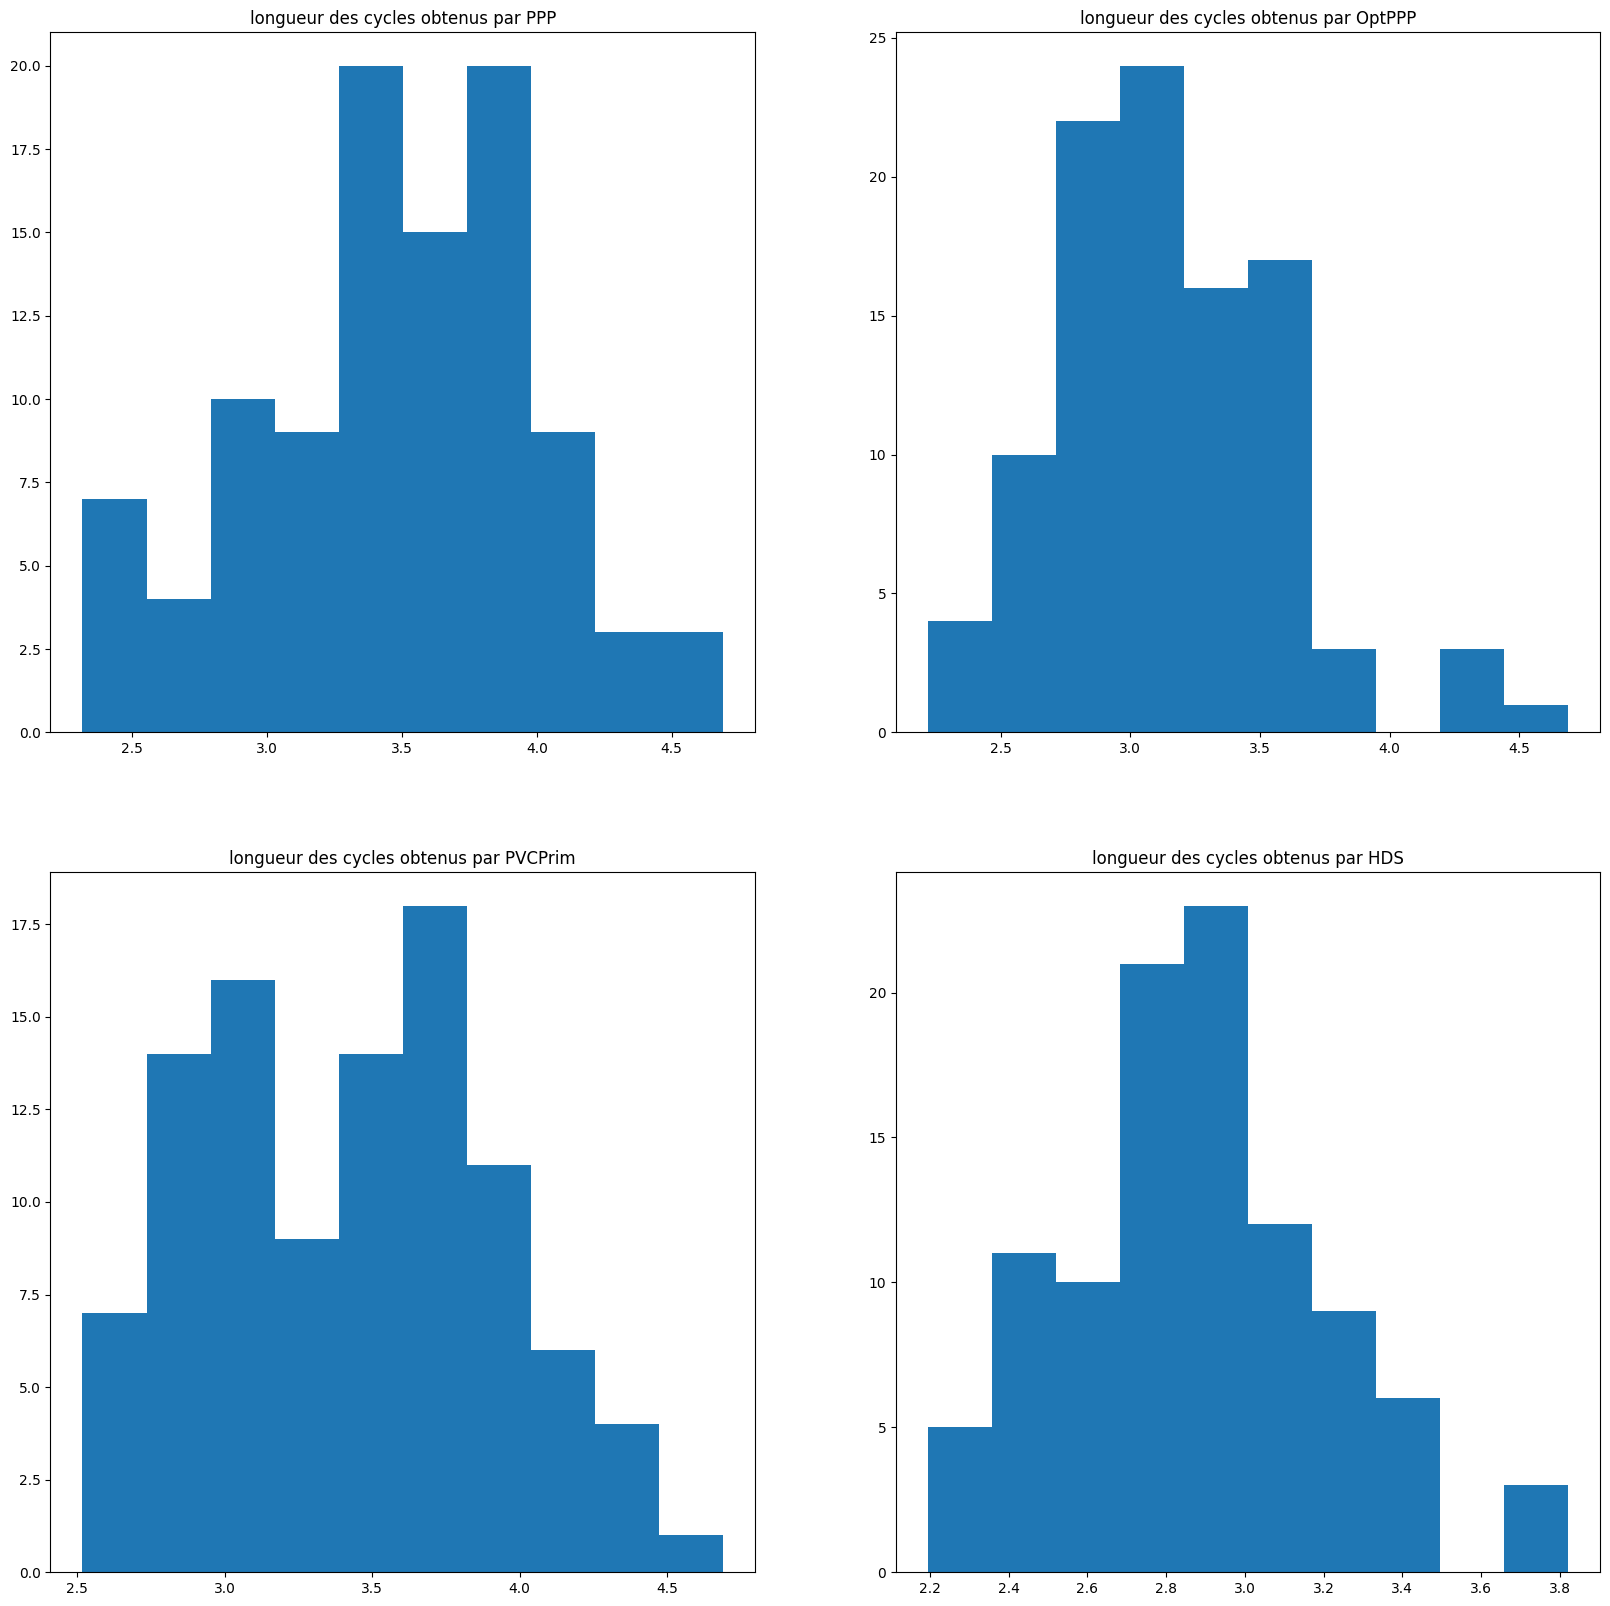

In [15]:
plt.figure(figsize=(20, 20))
plt.subplot(221)
plt.title("longueur des cycles obtenus par PPP")
plt.hist(cycles_ppp)
plt.subplot(222)
plt.title("longueur des cycles obtenus par OptPPP")
plt.hist(cycles_opt_ppp)
plt.subplot(223)
plt.title("longueur des cycles obtenus par PVCPrim")
plt.hist(cycles_opt_prim)
plt.subplot(224)
plt.title("longueur des cycles obtenus par HDS")
plt.hist(cycles_hds)

In [16]:
improvement_ppp = (stats[:, 1] - stats[:, 0]) / stats[:, 0] * 100
print(f"{improvement_ppp.mean():.2f}%")

improvement_prim = (stats[:, 2] - stats[:, 1]) / stats[:, 1] * 100
print(f"{improvement_prim.mean():.2f}%")

-9.36%
9.74%
